In [127]:
# import all necessary libararies
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import numpy as np
# Import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [67]:
#load the data from csv file
df = pd.read_csv('vgsales.csv',encoding='unicode_escape')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [68]:
# Checking the summary of the data in 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16584 entries, 0 to 16583
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16584 non-null  int64  
 1   Name          16584 non-null  object 
 2   Platform      16584 non-null  object 
 3   Year          16584 non-null  int64  
 4   Genre         16584 non-null  object 
 5   Publisher     16584 non-null  object 
 6   NA_Sales      16584 non-null  float64
 7   EU_Sales      16584 non-null  float64
 8   JP_Sales      16584 non-null  float64
 9   Other_Sales   16584 non-null  float64
 10  Global_Sales  16584 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


<Axes: >

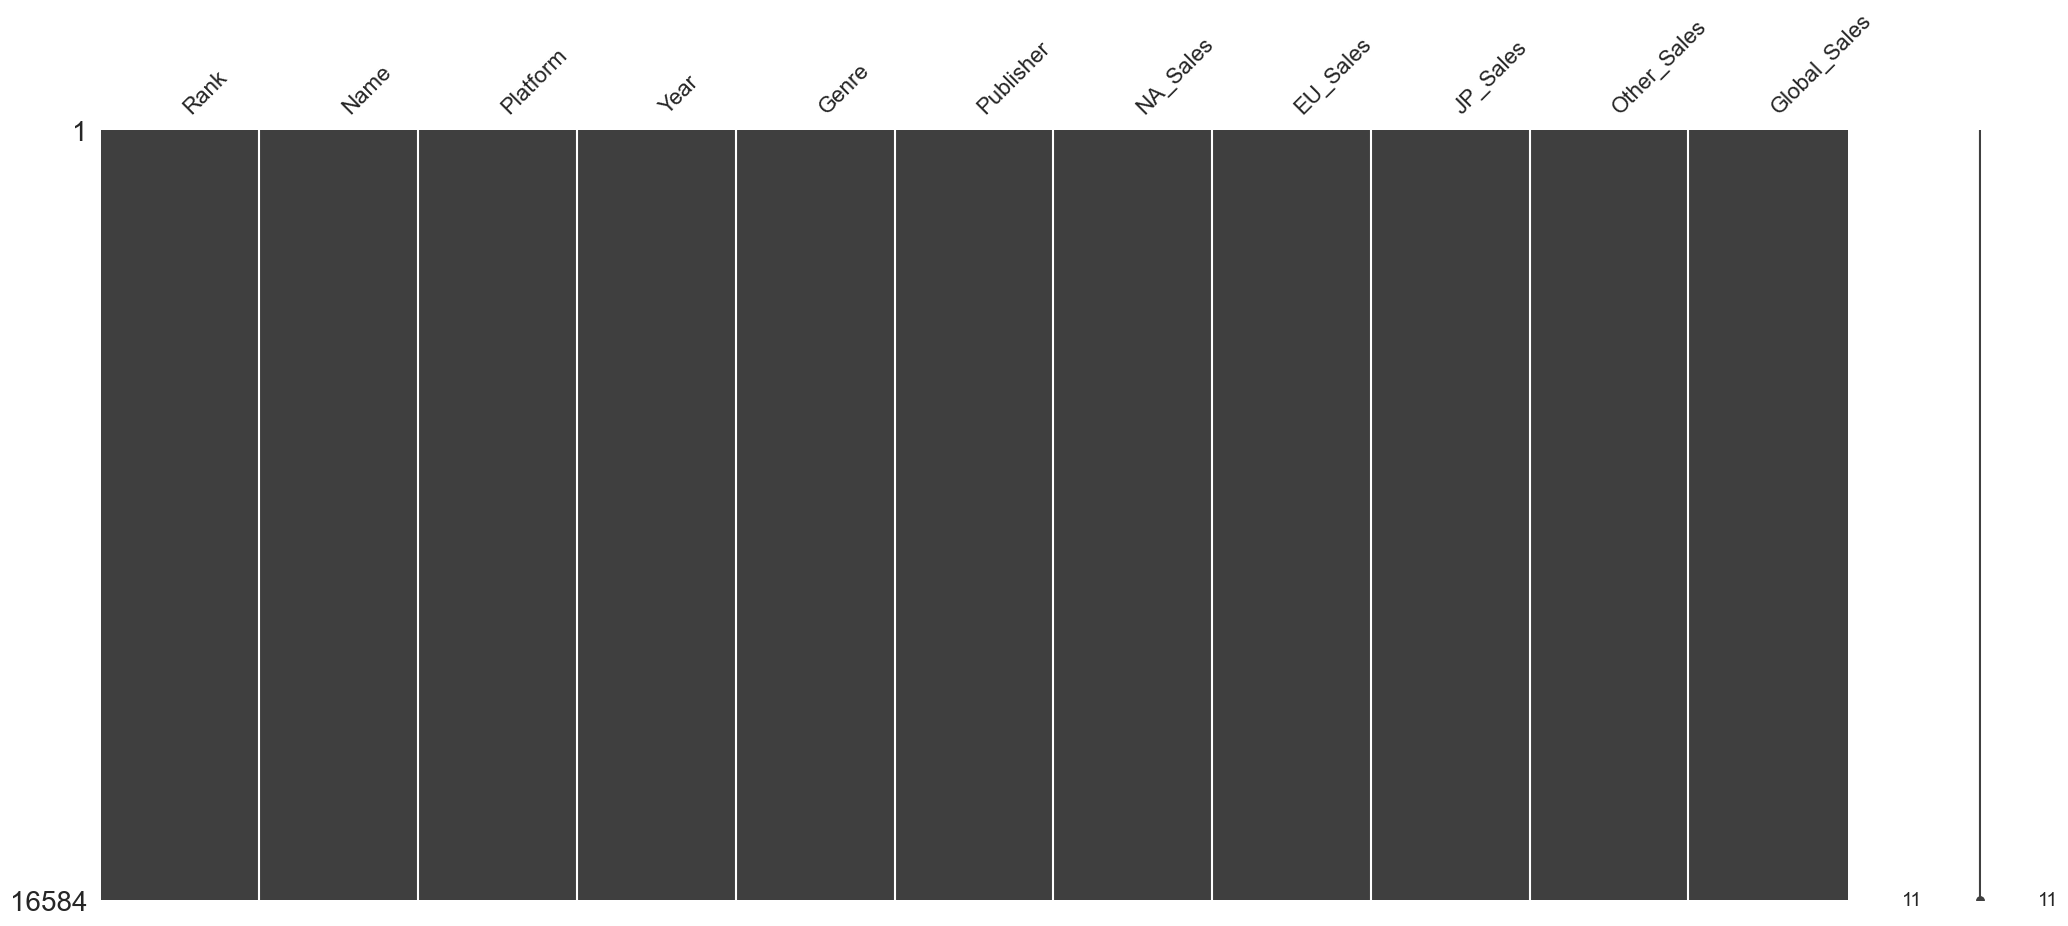

In [69]:
#check for missing data
msn.matrix(df)

In [70]:
# check for duplicates
duplicateRows = df[df.duplicated()]
duplicateRows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [71]:
#checkng data distribution
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16584.000000,16584.000000,16584.000000,16584.000000,16584.000000,16584.000000,16584.000000
mean,8296.263447,2006.389472,0.266345,0.148449,0.077983,0.048580,0.541632
std,4790.774555,5.861573,0.820864,0.516608,0.310213,0.190929,1.571084
min,1.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4147.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12442.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Text(0, 0.5, 'Count')

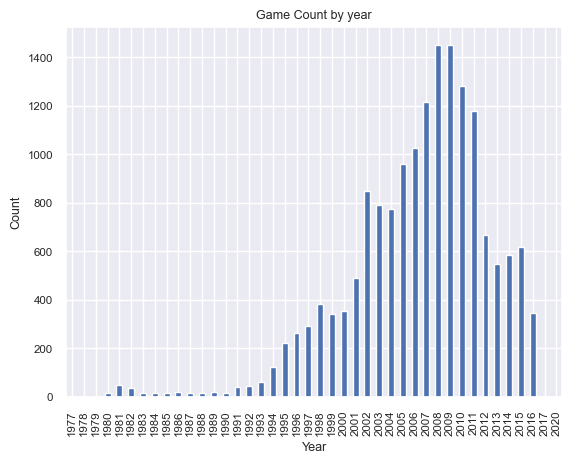

In [72]:
# visualise data by Year
df.groupby('Year').size().plot.bar()
plt.title('Game Count by year')
plt.ylabel('Count')
#notice that the data is not complete from 2016 as the data was published on that year

In [73]:
#dropping all years after 2015 as they are not complete
droppedRows = df[df['Year'] > 2015].index
df.drop(droppedRows, inplace = True)

Text(0, 0.5, 'Count')

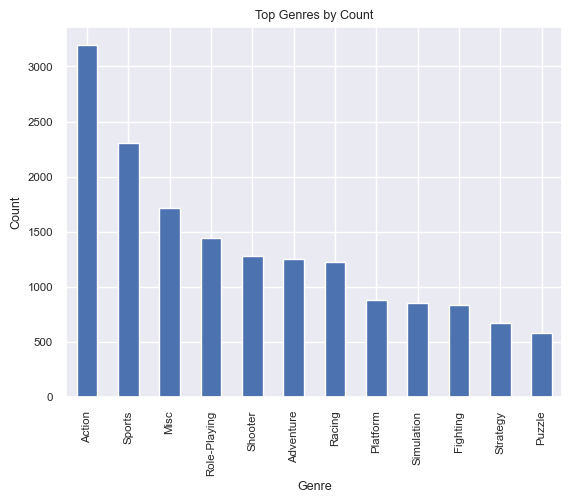

In [74]:
# Most Popular Genre Overall
df.groupby('Genre').size().sort_values(ascending=False).plot.bar()
plt.title('Top Genres by Count')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

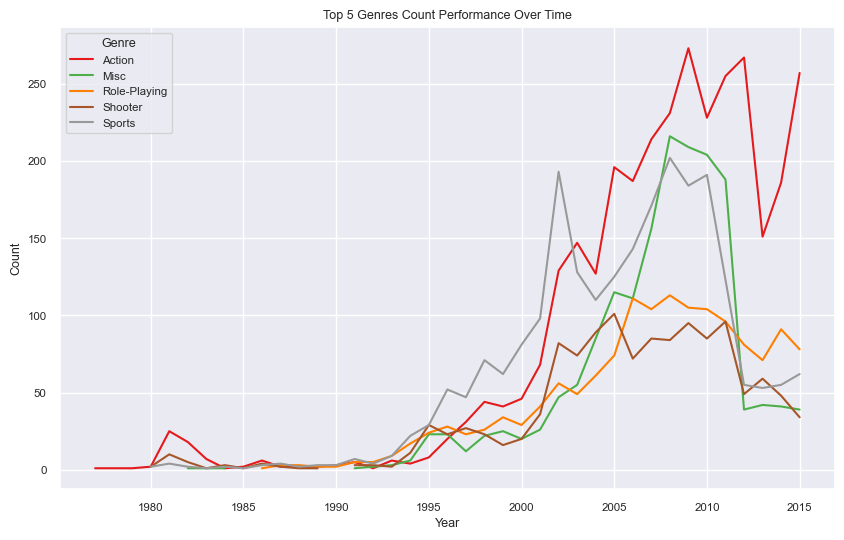

In [75]:
# plotting Genres count overtime
fig, ax = plt.subplots(figsize=(10, 6))
top5_genre_trend = df[df['Genre'].isin(['Action','Sports','Misc','Role-Playing','Shooter'])]
top5_genre_trend.groupby(['Year','Genre']).size().unstack().plot(kind='line', colormap='Set1', ax=ax)
plt.title('Top 5 Genres Count Performance Over Time')
plt.ylabel('Count')

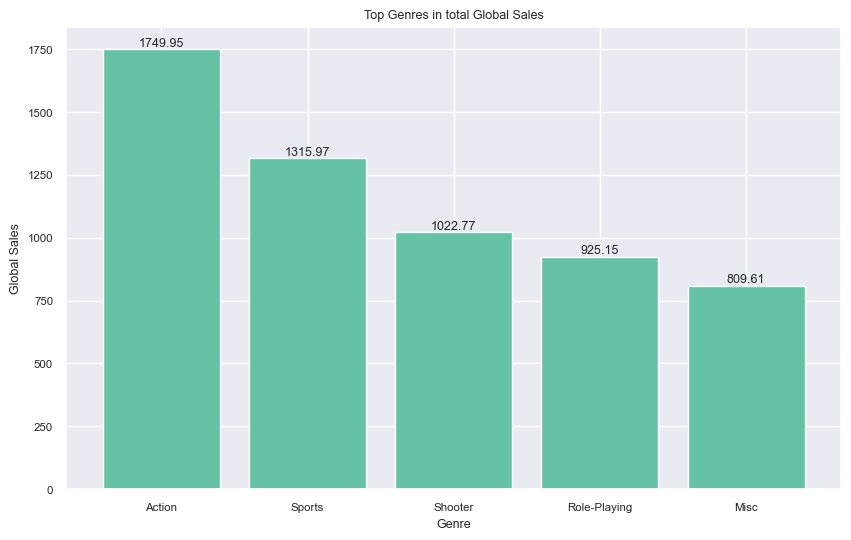

In [76]:
# plotting the Genres total Global sales by year as a bar plot
Genre_performance_OT = df[df['Genre'].isin(['Action','Sports','Misc','Role-Playing','Shooter'])]
ax = Genre_performance_OT.groupby(['Genre']).Global_Sales.sum().sort_values(ascending=False).plot(
    kind='bar',
    width=0.8,
    colormap='Set2',
    figsize=(10, 6)
)

plt.title('Top Genres in total Global Sales')
plt.ylabel('Global Sales')
plt.xticks(rotation=0) # setting X labels to be horizontal

# annotating each bar with its value to the neareast 2 decimal places
for i, v in enumerate(Genre_performance_OT.groupby(['Genre']).Global_Sales.sum().sort_values(ascending=False)):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Text(0, 0.5, 'Global Sales')

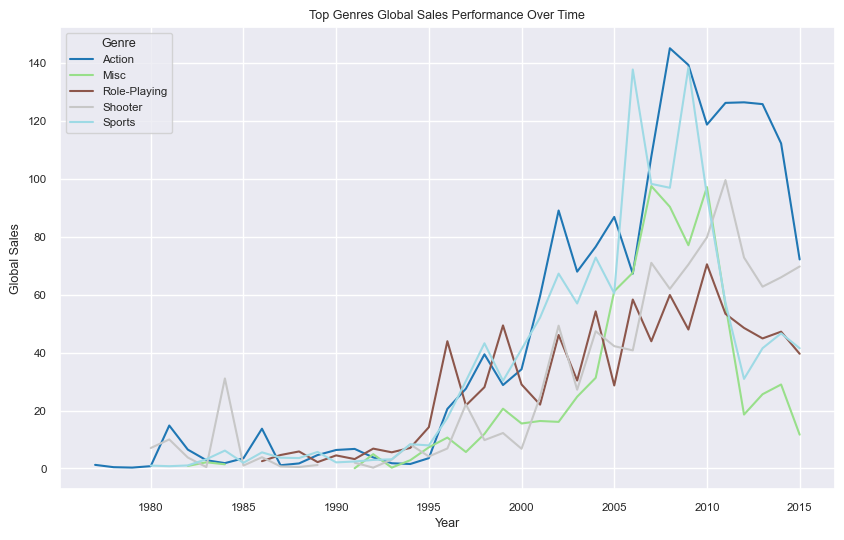

In [77]:
# Genre sales performance over time as a line plot
Genre_performance_OT.groupby(['Year','Genre']).Global_Sales.sum().unstack().plot(kind='line', colormap='tab20', figsize=(10, 6))
plt.title('Top Genres Global Sales Performance Over Time')
plt.ylabel('Global Sales')

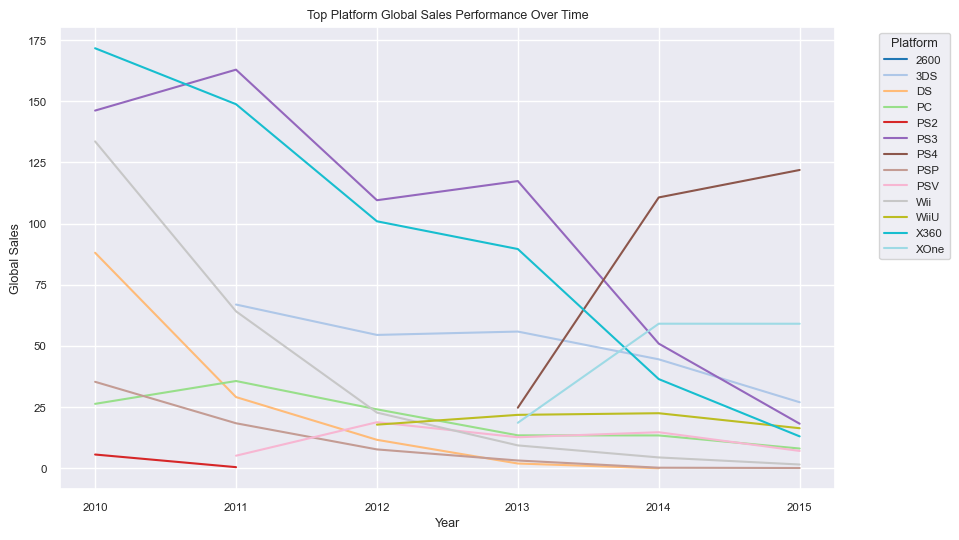

In [78]:
# Platform contributions to global sales over time
Top6_Platform_performance_OT = df[df['Year'] >= 2010] # getting only the last five years
Top6_Platform_performance_OT.groupby(['Year','Platform']).Global_Sales.sum().unstack().plot(kind='line', colormap='tab20', figsize=(10, 6))
plt.title('Top Platform Global Sales Performance Over Time')
plt.ylabel('Global Sales')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0, 0.5, 'Global Sales')

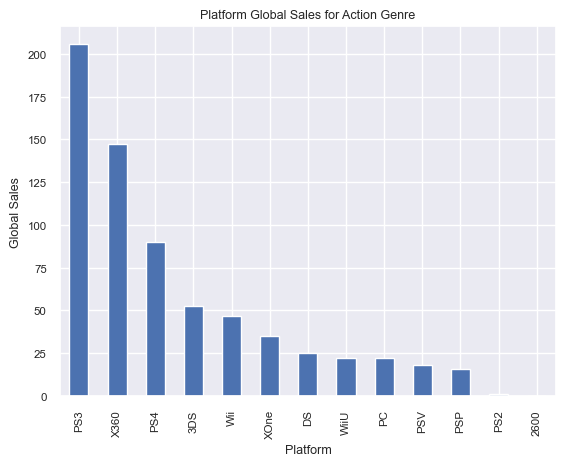

In [79]:
# top platforms for Action games according to global sales
top_platforms_4_Action = df[df['Genre'] == 'Action']
top_platforms_4_Action = top_platforms_4_Action[top_platforms_4_Action['Year'] >= 2010]
top_platforms_4_Action.groupby('Platform').Global_Sales.sum().sort_values(ascending=False).plot.bar()
plt.title('Platform Global Sales for Action Genre')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Global Sales')

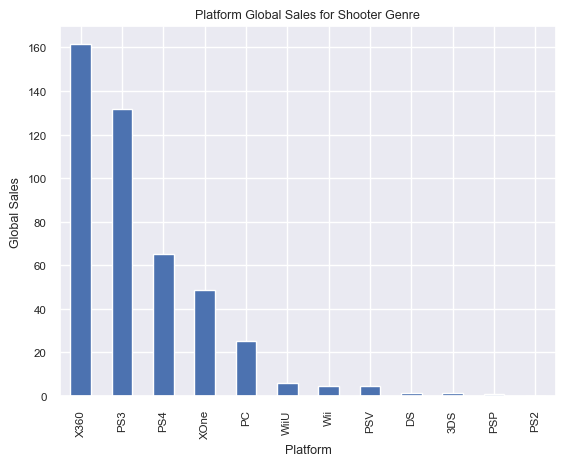

In [80]:
# top platforms for Shooter games according to global sales
top_platforms_4_Shooter = df[df['Genre'] == 'Shooter']
top_platforms_4_Shooter = top_platforms_4_Shooter[top_platforms_4_Shooter['Year'] >= 2010]
top_platforms_4_Shooter.groupby('Platform').Global_Sales.sum().sort_values(ascending=False).plot.bar()
plt.title('Platform Global Sales for Shooter Genre')
plt.ylabel('Global Sales')

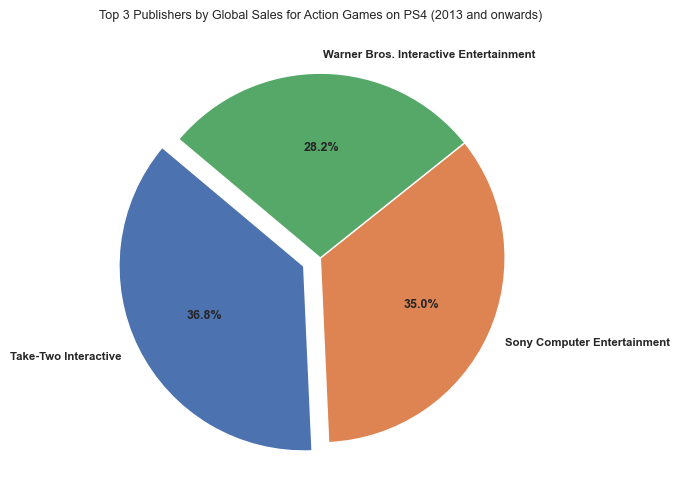

In [81]:
top_puplishers_4_Action = df[df['Genre'] == 'Action']
top_puplishers_4_Action = top_puplishers_4_Action[top_puplishers_4_Action['Platform'] == 'PS4']
top_puplishers_4_Action = top_puplishers_4_Action[top_puplishers_4_Action['Year'] >= 2013]

# Find the top 3 publishers by global sales
top_publishers = top_puplishers_4_Action.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).head(3)

text_props = {'weight': 'bold'}

# Create a pie plot for the top 3 publishers
plt.figure(figsize=(6, 6))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0), textprops=text_props)

# Set the title
plt.title('Top 3 Publishers by Global Sales for Action Games on PS4 (2013 and onwards)')

# Display the pie plot
plt.show()

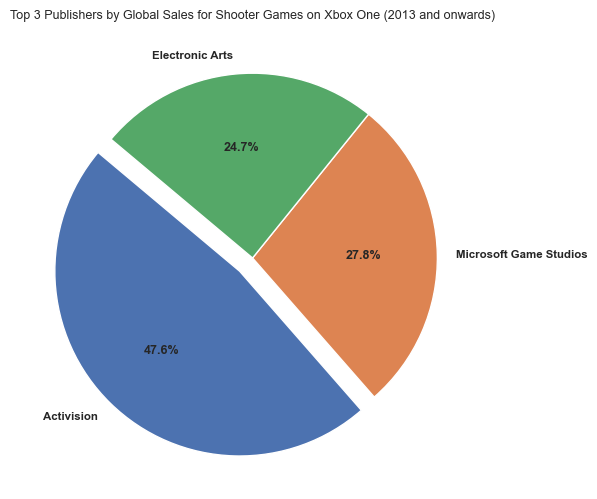

In [82]:
top_puplishers_4_Shooter = df[df['Genre'] == 'Shooter']
top_puplishers_4_Shooter = top_puplishers_4_Shooter[top_puplishers_4_Shooter['Platform'] == 'XOne']
top_puplishers_4_Shooter = top_puplishers_4_Shooter[top_puplishers_4_Shooter['Year'] >= 2013]

# Find the top 3 publishers by global sales
top_puplishers_4_Shooter = top_puplishers_4_Shooter.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).head(3)

text_props = {'weight': 'bold'}

# Create a pie plot for the top 3 publishers
plt.figure(figsize=(6, 6))
plt.pie(top_puplishers_4_Shooter, labels=top_puplishers_4_Shooter.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0), textprops=text_props)

# Set the title
plt.title('Top 3 Publishers by Global Sales for Shooter Games on Xbox One (2013 and onwards)')

# Display the pie plot
plt.show()

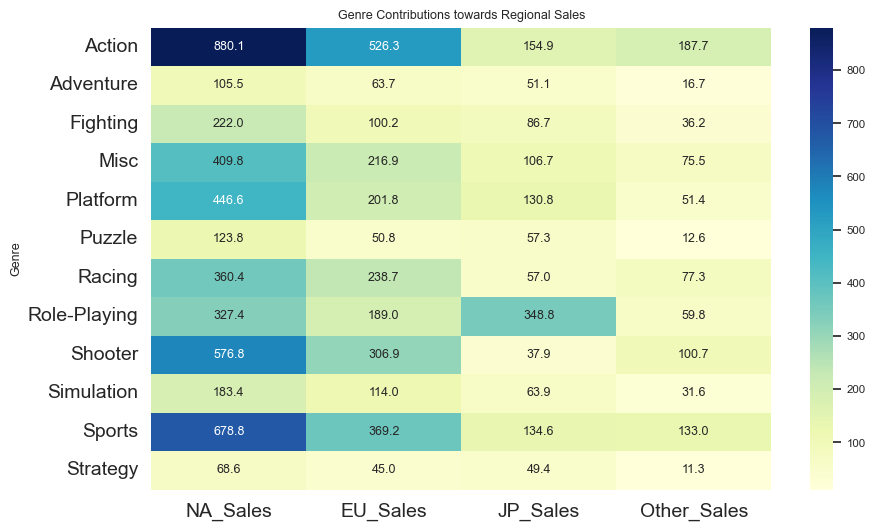

In [83]:
# Filter data to keep only Genres and Regional sales
Region_sales_by_Genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Region_sales_by_Genre = Region_sales_by_Genre.groupby('Genre').sum()

# plot heat map for Gneres and Regional Sales
text_props = {'weight': 'bold'}
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.75)
sns.heatmap(Region_sales_by_Genre, annot=True, fmt='.1f', cmap='YlGnBu')

plt.title('Genre Contributions towards Regional Sales')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

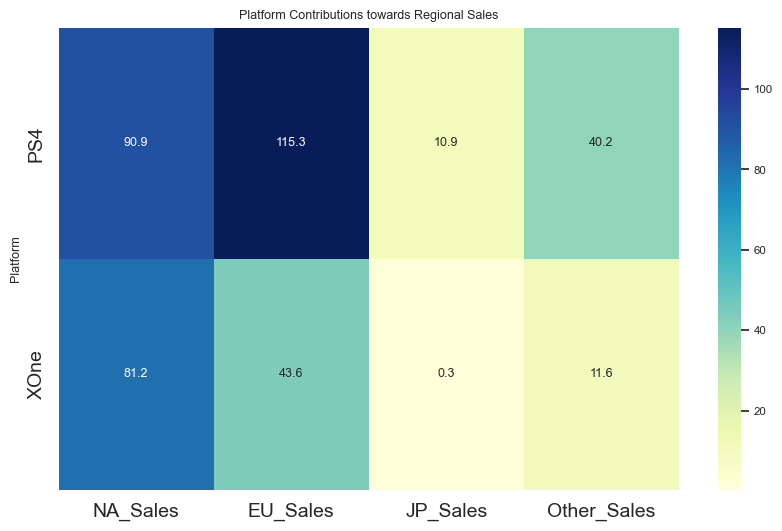

In [84]:
# Filter data to keep only needed platforms and Regional sales
Region_sales_by_Platform = df[df['Year'] >= 2010]
Region_sales_by_Platform = Region_sales_by_Platform[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Region_sales_by_Platform = Region_sales_by_Platform[Region_sales_by_Platform['Platform'].isin(['PS4','XOne'])]
Region_sales_by_Platform = Region_sales_by_Platform.groupby('Platform').sum()

# plot heatmap for PS4 and Xbox Ones relation with Regional Sales
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.75)
sns.heatmap(Region_sales_by_Platform, annot=True, fmt='.1f', cmap='YlGnBu')  # Use a different colormap if desired

plt.title('Platform Contributions towards Regional Sales')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

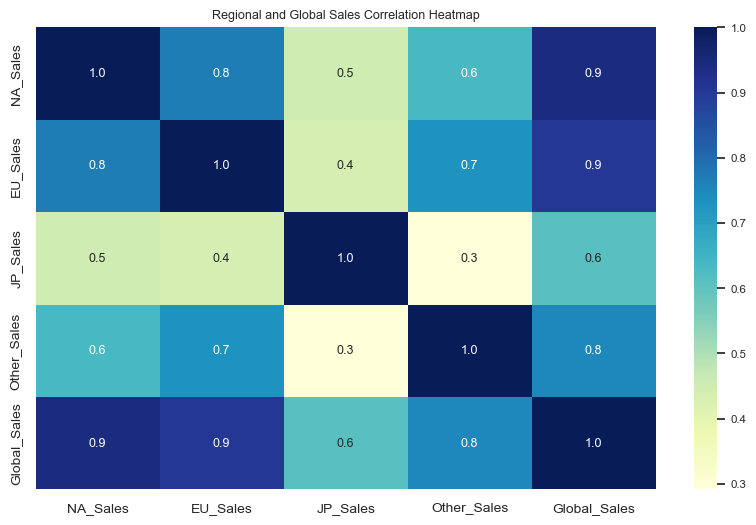

In [85]:
sales_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
sales_corr = sales_corr.corr()

# plotting coorelation matrix heatmap to identify relations betwwen regions in sales
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.75)
sns.heatmap(sales_corr, annot=True, fmt = '.1f', cmap='YlGnBu')

plt.title('Regional and Global Sales Correlation Heatmap')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Supervised Learning

In [86]:
# Extracting the required columns for analysis
df_mod = df[["Platform", "Year", "Genre", "Publisher", "Global_Sales"]]
df_mod

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006,Sports,Nintendo,82.74
1,NES,1985,Platform,Nintendo,40.24
2,Wii,2008,Racing,Nintendo,35.82
3,Wii,2009,Sports,Nintendo,33.00
4,GB,1996,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16579,GBA,2002,Platform,Kemco,0.01
16580,GC,2003,Shooter,Infogrames,0.01
16581,PS2,2008,Racing,Activision,0.01
16582,DS,2010,Puzzle,7G//AMES,0.01


In [87]:
df_mod = df_mod[df_mod['Year'] <= 2015]
df_mod

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006,Sports,Nintendo,82.74
1,NES,1985,Platform,Nintendo,40.24
2,Wii,2008,Racing,Nintendo,35.82
3,Wii,2009,Sports,Nintendo,33.00
4,GB,1996,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16579,GBA,2002,Platform,Kemco,0.01
16580,GC,2003,Shooter,Infogrames,0.01
16581,PS2,2008,Racing,Activision,0.01
16582,DS,2010,Puzzle,7G//AMES,0.01


In [88]:
# Creating a dataframe for top three genre
df_shooter = df_mod[df_mod["Genre"]=="Shooter"]
df_action = df_mod[df_mod["Genre"]=="Action"]

In [89]:
# Creating a dataframe for top three genre
shooter_sales = df_shooter.groupby("Year")["Global_Sales"].sum()
action_sales = df_action.groupby("Year")["Global_Sales"].sum()

In [90]:
df_shooter_sales = pd.DataFrame({'Year': shooter_sales.index, 'Global_shooter_sales': shooter_sales.values})
df_action_sales = pd.DataFrame({'Year': action_sales.index, 'Global_action_sales': action_sales.values})

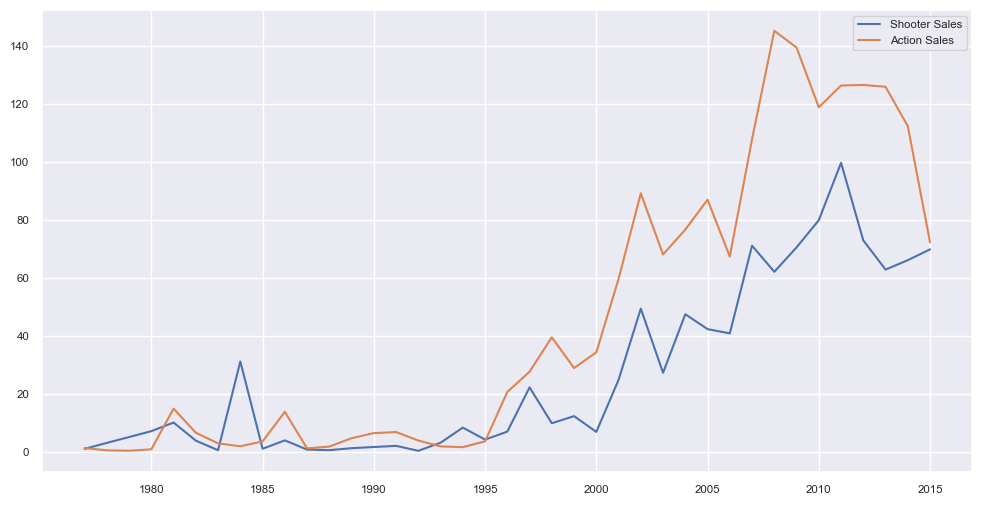

In [91]:
fig = plt.figure(figsize=(12,6))
plt.plot(df_shooter_sales["Year"], df_shooter_sales["Global_shooter_sales"], label="Shooter Sales")
plt.plot(df_action_sales["Year"], df_action_sales["Global_action_sales"], label="Action Sales")
plt.legend()
plt.show()

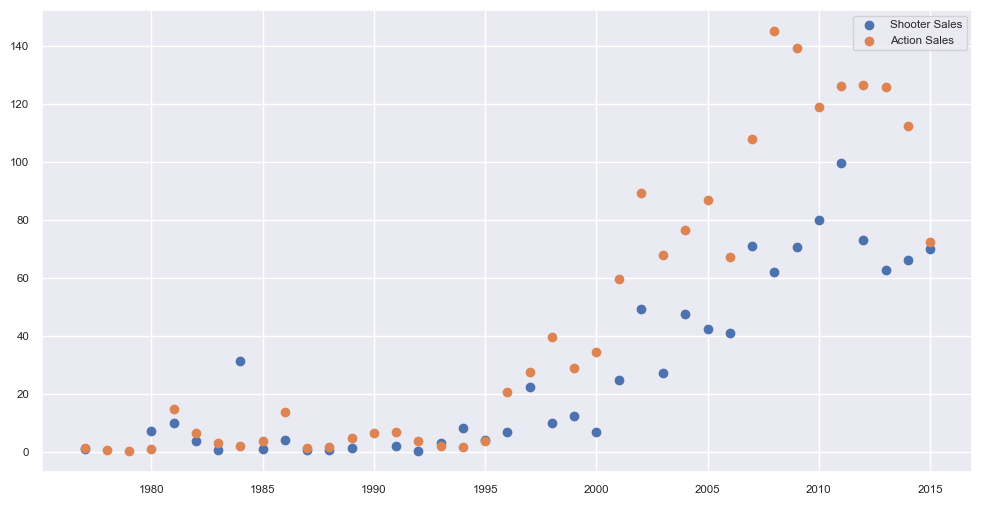

In [92]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df_shooter_sales["Year"], df_shooter_sales["Global_shooter_sales"], label="Shooter Sales")
plt.scatter(df_action_sales["Year"], df_action_sales["Global_action_sales"], label="Action Sales")
plt.legend()
plt.show()

In [93]:
# Function to train and give detailed evaluation for the multiple model
def train_models(x_train, x_test, y_train, y_test, model_list, model_names):
    
    # Initilizing an empty to store evaluation metrics
    r2_train_result = []
    r2_test_result = []
    rmse_train_result = []
    rmse_test_result = []
    mse_train_result = []
    mse_test_result = []
    mae_train_result = []
    mae_test_result = []
    trained_model_list = []
    
    r2_result = []
    rmse_result = []
    mse_result = []
    mae_result = []
    
    # Iterating for models in the model list
    for model in model_list:
            
        # Printing the training status
        print("Training : ", model)
        
        # Training the model
        model.fit(x_train, y_train)
        trained_model_list.append(model)
        
        # Evaluating training metrics
        r2_train, rmse_train, mse_train, mae_train = evaluate_model(x_train, y_train, model)
        
        # Appending train list
        r2_train_result.append(r2_train)
        rmse_train_result.append(rmse_train)
        mse_train_result.append(mse_train)
        mae_train_result.append(mae_train)
        
        # Evaluate testing metrics
        r2_test, rmse_test, mse_test, mae_test = evaluate_model(x_test, y_test, model)
        
        # Evaluating testing data
        r2_test_result.append(r2_test)
        rmse_test_result.append(rmse_test)
        mse_test_result.append(mse_test)
        mae_test_result.append(mae_test)
        
        # Printing the training status
        print("Evaluation Completed!!!\n\n")
        
        
    r2_result = [r2_train_result, r2_test_result]
    rmse_result = [rmse_train_result, rmse_test_result]
    mse_result = [mse_train_result, mse_test_result]
    mae_result = [mae_train_result, mae_test_result]
        
    # Compiling R2 result into dataFrame
    df_r2_result = pd.DataFrame(r2_result, index=["Train", "Test"], columns=model_names)
        
    # Compiling R2 result into dataFrame
    df_rmse_result = pd.DataFrame(rmse_result, index=["Train", "Test"], columns=model_names)
    
    # Compiling R2 result into dataFrame
    df_mse_result = pd.DataFrame(mse_result, index=["Train", "Test"], columns=model_names)
    
    # Compiling R2 result into dataFrame
    df_mae_result = pd.DataFrame(mae_result, index=["Train", "Test"], columns=model_names)

    return df_r2_result, df_rmse_result, df_mse_result, df_mae_result, trained_model_list

In [94]:
# Function to evaluate the metrics for the model
def evaluate_model(x, y, model):
    
    # Making predictions
    preds = model.predict(x)
    
    # Calculating r2, RMSE, MAE & MSE scores for the model
    r2 = r2_score(y, preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    mse = mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    
    return r2, rmse, mse, mae

In [95]:
# Function to evaluate prediction
def get_preds(x, model):
    
    # Making predictions
    preds = model.predict(x)
    
    return preds

In [96]:
# Define a custom function to compare the regression metrics for different models
def compare_metrics(result, title, model_names):
    # Getting result data for the bar charts
    # Result for r2
    r2_train = result[0].iloc[0].values
    r2_test = result[0].iloc[1].values

    # Result for rmse
    rmse_train = result[1].iloc[0].values
    rmse_test = result[1].iloc[1].values

    # Result for mse
    mse_train = result[2].iloc[0].values
    mse_test = result[2].iloc[1].values

    # Result for mae
    mae_train = result[3].iloc[0].values
    mae_test = result[3].iloc[1].values

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Define the width of each bar
    bar_width = 0.35
    
    # Function to add labels to bars at the center
    def add_labels_to_r2_bars(ax, y1, y2):
        for i, v in enumerate(y1):
            ax.text(i - bar_width/2, v/2, str("{:.2}".format(v)), ha='center', va='bottom')
        for i, v in enumerate(y2):    
            ax.text(i + bar_width/2, v/2, str("{:.2}".format(v)), ha='center', va='bottom')
            
    # Function to add labels to bars at the center
    def add_labels_to_bars(ax, y1, y2):
        for i, v in enumerate(y1):
            ax.text(i - bar_width/2, v/2, str(int(v)), ha='center', va='bottom')
        for i, v in enumerate(y2):    
            ax.text(i + bar_width/2, v/2, str(int(v)), ha='center', va='bottom')

    # Define the x-axis positions for each group of bars
    tick_num = np.arange(len(r2_train))
    tick_labels = model_names

    # Create side-by-side bar plots in each subplot
    axes[0, 0].bar(tick_num - bar_width/2, r2_train, bar_width, label='R2 Train')
    axes[0, 0].bar(tick_num + bar_width/2, r2_test, bar_width, label='R2 Test')
    axes[0, 0].set(ylabel='R2 Score')
    axes[0, 0].set_xticks(tick_num)
    axes[0, 0].set_xticklabels(tick_labels)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_title("R2 Score - Train vs. Test")
    add_labels_to_r2_bars(axes[0, 0], r2_train, r2_test)
    axes[0, 0].legend(loc='upper right')

    axes[0, 1].bar(tick_num - bar_width/2, rmse_train, bar_width, label='RMSE Train')
    axes[0, 1].bar(tick_num + bar_width/2, rmse_test, bar_width, label='RMSE Test')
    axes[0, 1].set(ylabel='RMSE Score')
    axes[0, 1].set_xticks(tick_num)
    axes[0, 1].set_xticklabels(tick_labels)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_title("RMSE Score - Train vs. Test")
    add_labels_to_bars(axes[0, 1], rmse_train, rmse_test)
    axes[0, 1].legend(loc='upper right')

    axes[1, 0].bar(tick_num - bar_width/2, mse_train, bar_width, label='MSE Train')
    axes[1, 0].bar(tick_num + bar_width/2, mse_test, bar_width, label='MSE Test')
    axes[1, 0].set(ylabel='MSE Score')
    axes[1, 0].set_xticks(tick_num)
    axes[1, 0].set_xticklabels(tick_labels)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].set_title("MSE Score - Train vs. Test")
    add_labels_to_bars(axes[1, 0], mse_train, mse_test)
    axes[1, 0].legend(loc='upper right')

    axes[1, 1].bar(tick_num - bar_width/2, mae_train, bar_width, label='MAE Train')
    axes[1, 1].bar(tick_num + bar_width/2, mae_test, bar_width, label='MAE Test')
    axes[1, 1].set(ylabel='MAE Score')
    axes[1, 1].set_xticks(tick_num)
    axes[1, 1].set_xticklabels(tick_labels)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_title("MAE Score - Train vs. Test")
    add_labels_to_bars(axes[1, 1], mae_train, mae_test)
    axes[1, 1].legend(loc='upper right')

    # Label complete plot
    fig.suptitle(title)

    # Adjust layout
    plt.tight_layout()

    # Show the figure
    plt.legend()

    # Show the figure
    plt.show()

In [97]:
# Define a custom function to predict the future sales and plot them
def plot_preds(x, y_true, result, pred_date, plot_title, model_names):
    
    # Storing the linear regression, decision tree and random forest regressor models into variable
    model_list = result[4]
    preds_list = []
    future_preds_list = []
    
    for model in model_list:
        preds_list.append(get_preds(x.sort_index(), model))
        
    future = pred_date+1
    future_years = list(range(x['Year'].max(), future))
    future_years_df = pd.DataFrame({'Year': future_years})
    
    for model in model_list:
        future_preds_list.append(get_preds(future_years_df, model))
    
    fig = plt.figure(figsize=(12,6))
    
    # Plotting the true data
    plt.scatter(x.sort_index(), y_true.sort_index(), label="True Data", c='m')
    
    # Define a list of colors
    colors = ['b', 'g', 'r', 'c', 'y', 'k']
    
    index = 0
    for name in model_names:
        
        plt.plot(x.sort_index(), preds_list[index], label=name, c=colors[index])
        plt.plot(future_years, future_preds_list[index], c=colors[index], linestyle='dotted')
        
        index += 1
        
        if index >= 5:
            index = 0    
    
    
    custom_x_ticks = [1980, 1990, 2000, 2010]
    custom_x_ticks = custom_x_ticks + future_years
    custom_x_ticks
    
    #plt.xticks(custom_x_ticks)
    plt.xticks(custom_x_ticks, rotation=45)
    
    plt.xlabel("Year")
    plt.ylabel("Global Sales")
    plt.title(plot_title)
    
    plt.legend(loc='upper left')
    plt.show()
    
    return preds_list, future_preds_list

In [98]:
# Define a custom function to perform the complete analysis from model building to result presentation
def perform_analysis(feature, target, reg_models, model_names, title, pred_date=2025):
    
    # Do train test split
    x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.4, random_state=10)
    
    # Train multiple models using the custom function
    result = train_models(x_train, x_test, y_train, y_test, reg_models, model_names)
    
    # Compare the regression metrics for the trained models
    metric_title = 'Regression Metrics Comparison : ' + title
    compare_metrics(result, metric_title, model_names)
    
    # Make predictions with the trained models
    preds_title = title + ' : Global Sales Projection'
    preds_list, future_preds_list = plot_preds(feature, target, result, pred_date, preds_title, model_names)
    
    return preds_list, future_preds_list

In [99]:
# Initializing the regression models
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

# Storing the models in a list
reg_models = [lr, dtr, rfr]

# Storing model names in a list
model_names = ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor"]

Training :  LinearRegression()
Evaluation Completed!!!


Training :  DecisionTreeRegressor()
Evaluation Completed!!!


Training :  RandomForestRegressor()
Evaluation Completed!!!




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21976\247513498.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


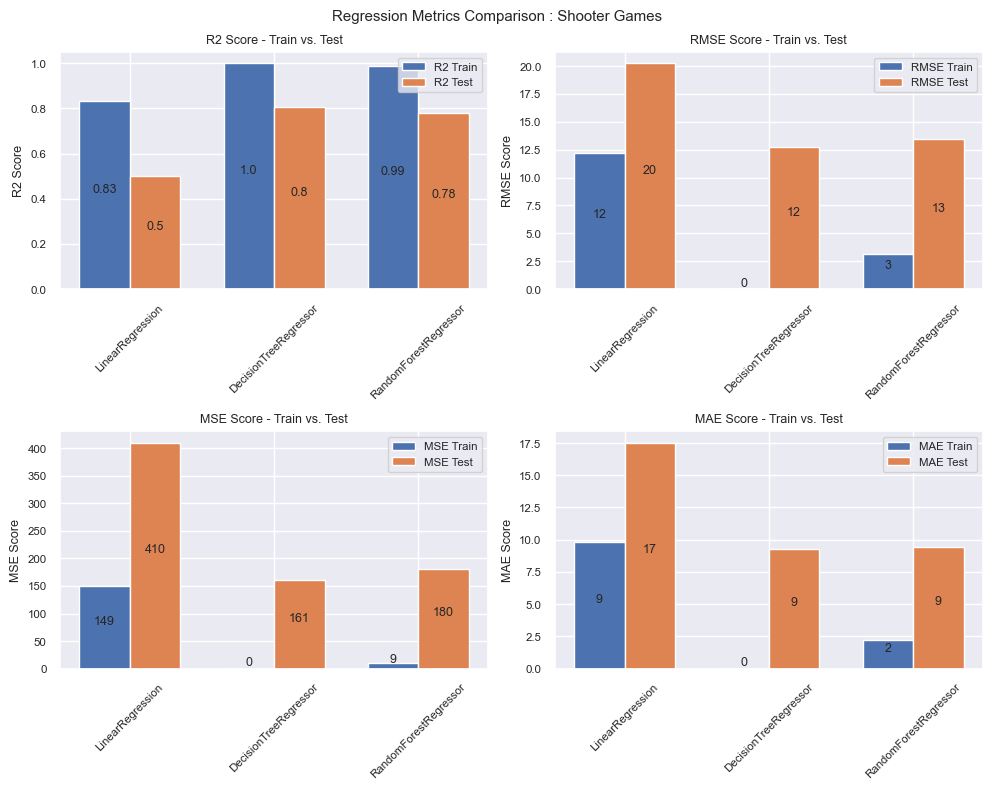

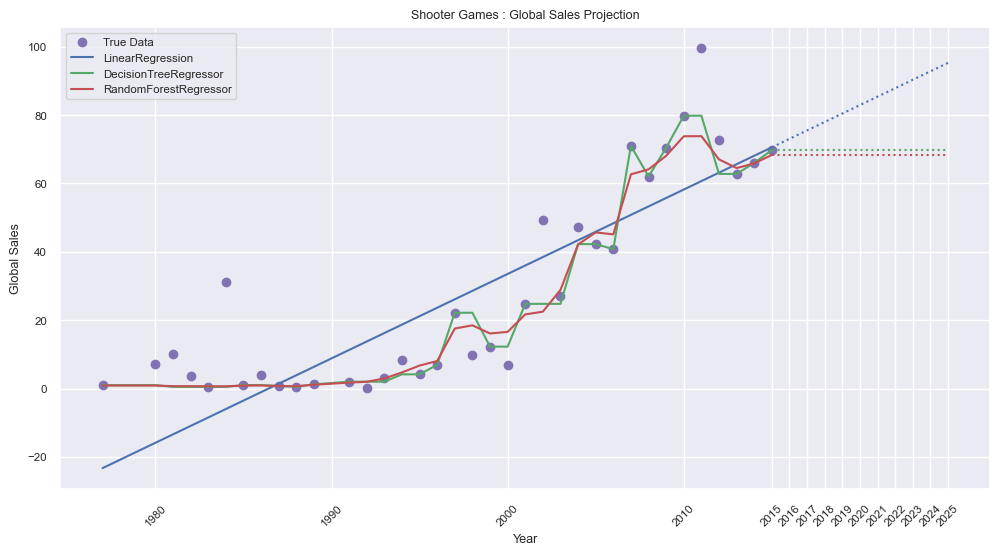

In [100]:
# Creating the features and targets for regression
shooter_feature1 = df_shooter_sales[["Year"]]
shooter_target1 = df_shooter_sales[["Global_shooter_sales"]]

# Perform analysis for action games
preds_list, future_preds_list = perform_analysis(shooter_feature1, shooter_target1, reg_models, model_names, 'Shooter Games', 2025)

Training :  LinearRegression()
Evaluation Completed!!!


Training :  DecisionTreeRegressor()
Evaluation Completed!!!


Training :  RandomForestRegressor()
Evaluation Completed!!!




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21976\247513498.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


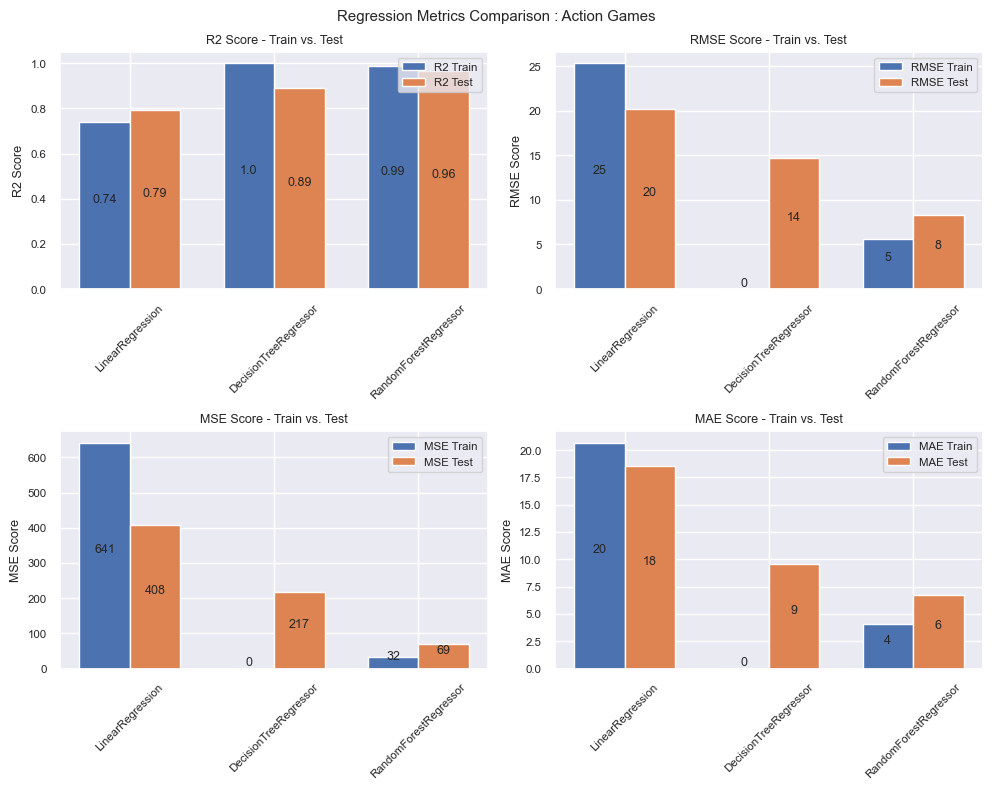

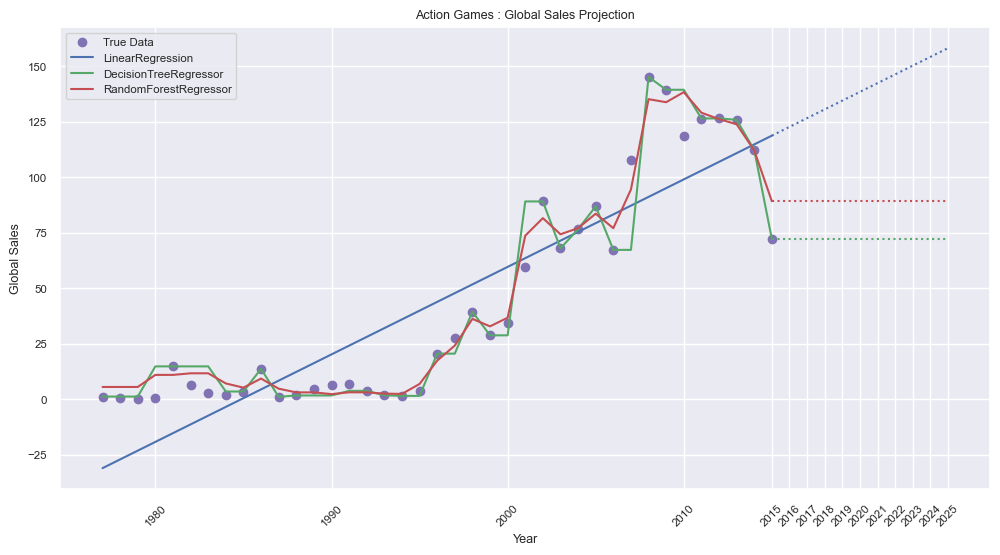

In [101]:
# Creating the features and targets for regression
action_feature1 = df_action_sales[["Year"]]
action_target1 = df_action_sales[["Global_action_sales"]]

# Perform analysis for sports games
preds_list, future_preds_list = perform_analysis(action_feature1, action_target1, reg_models, model_names, 'Action Games', 2025)

In [102]:
# Initializing the regression models
lr = LinearRegression()

# Storing the models in a list
reg_models = [lr]

# Storing model names in a list
model_names = ["Linear Regression"]

Training :  LinearRegression()
Evaluation Completed!!!




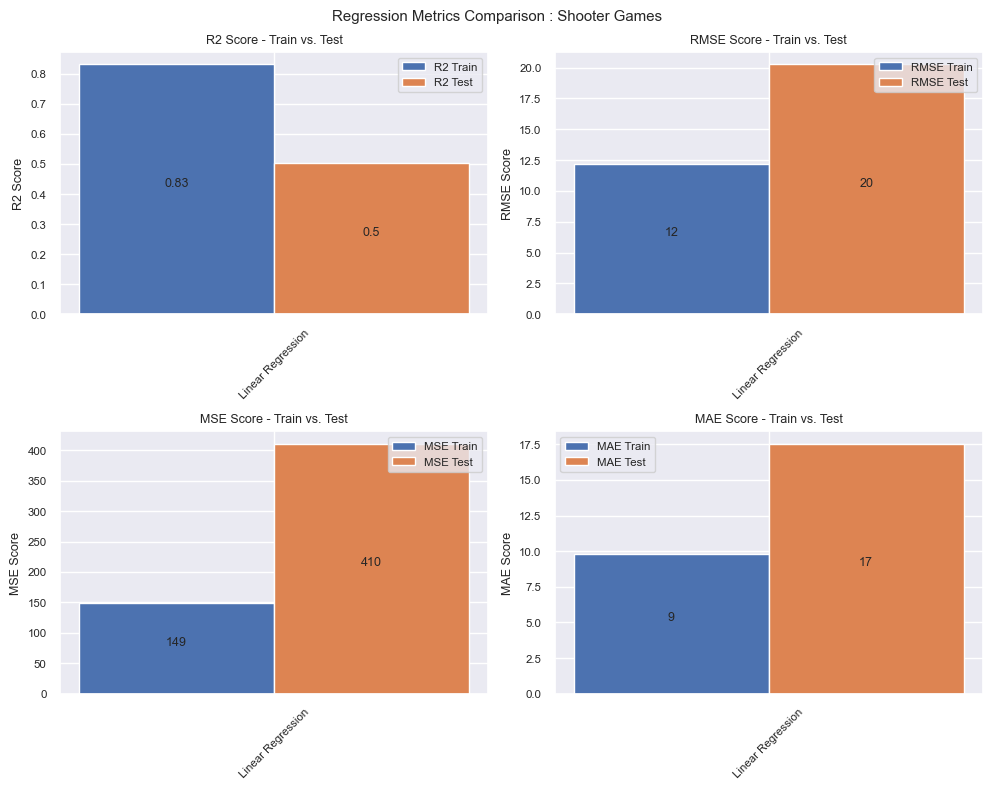

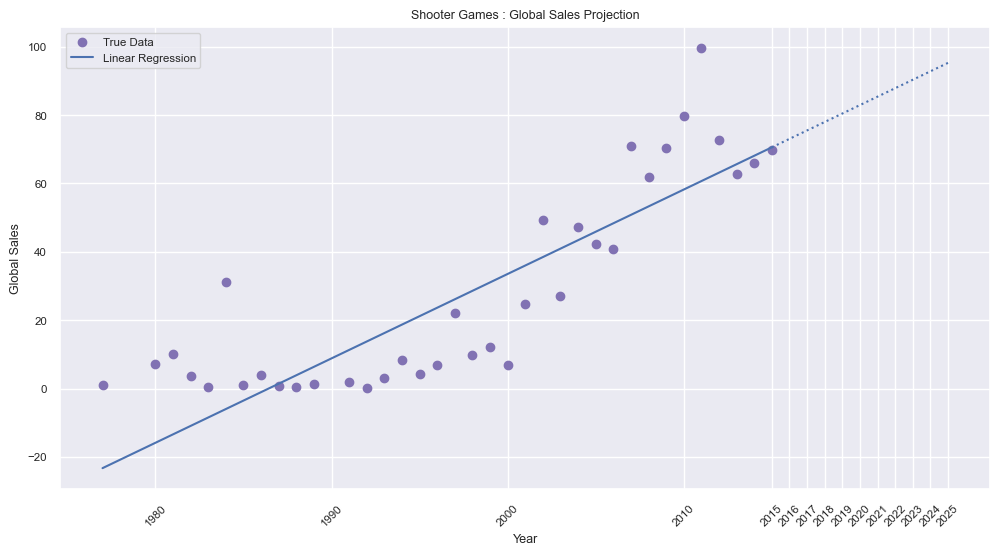

In [103]:
# Perform analysis for action games
preds_list, future_preds_list = perform_analysis(shooter_feature1, shooter_target1, reg_models, model_names, 'Shooter Games', 2025)

Training :  LinearRegression()
Evaluation Completed!!!




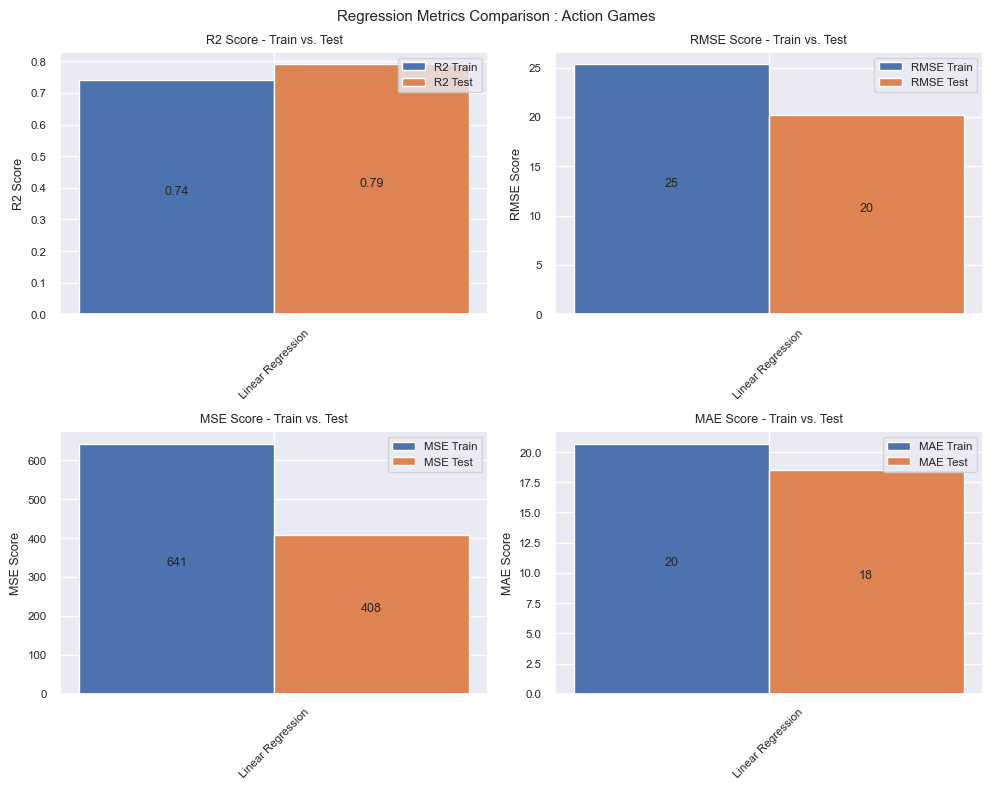

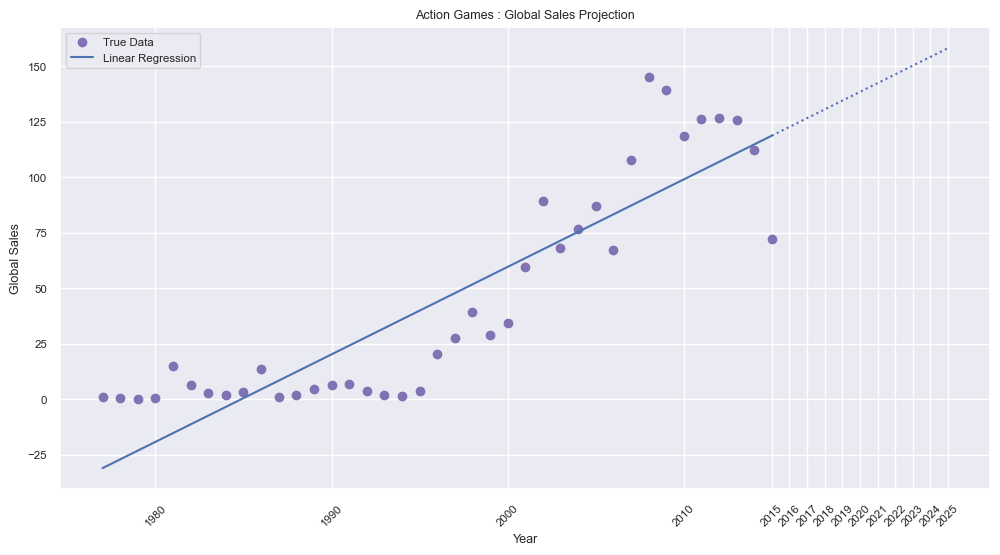

In [104]:
# Perform analysis for action games
preds_list, future_preds_list = perform_analysis(action_feature1, action_target1, reg_models, model_names, 'Action Games', 2025)

Unsupervised Learning

In [105]:
# Extracting the required columns for analysis
df_mod2 = df[["Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
df_mod2

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16579,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16580,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16582,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [106]:
df_mod2_shooter = df_mod2[df["Genre"]=="Shooter"]
df_mod2_shooter

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
29,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
...,...,...,...,...,...,...,...,...,...
16462,X360,2011,Shooter,Cave,0.00,0.00,0.01,0.00,0.01
16487,PC,2010,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16563,PC,2009,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16571,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


In [107]:
df_mod2_action = df_mod2[df["Genre"]=="Action"]
df_mod2_action

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...
16535,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01
16550,DS,2007,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16553,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16568,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01


In [108]:
# One-Hot Encoding
df_mod2_encoded = pd.get_dummies(df_mod2, columns=['Platform', "Genre", "Publisher"], drop_first = True)

# Copying the data
df_mod2_label_encoded_shooter = df_mod2.copy(deep=True)
df_mod2_label_encoded_action = df_mod2.copy(deep=True)

# Categorical Encoding
label_encoder = LabelEncoder()
df_mod2_label_encoded_shooter['Platform'] = label_encoder.fit_transform(df_mod2_label_encoded_shooter['Platform'])
df_mod2_label_encoded_shooter['Genre'] = label_encoder.fit_transform(df_mod2_label_encoded_shooter['Genre'])
df_mod2_label_encoded_shooter['Publisher'] = label_encoder.fit_transform(df_mod2_label_encoded_shooter['Publisher'])

# Categorical Encoding
label_encoder = LabelEncoder()
df_mod2_label_encoded_action['Platform'] = label_encoder.fit_transform(df_mod2_label_encoded_action['Platform'])
df_mod2_label_encoded_action['Genre'] = label_encoder.fit_transform(df_mod2_label_encoded_action['Genre'])
df_mod2_label_encoded_action['Publisher'] = label_encoder.fit_transform(df_mod2_label_encoded_action['Publisher'])

In [109]:
def perform_kmeans(train_data, num_clusters):

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(train_data)

    intertia_list = []
    label_list = []
    silhouette_score_list = []
    calinski_harabasz_score_list = []

    for i in range(2, num_clusters + 1):
        kmeans=KMeans(n_clusters = i + 1)
        kmeans.fit(X_scaled)
        intertia = kmeans.inertia_
        kmeans_labels = kmeans.predict(X_scaled)
        kmeans_silhouette_score = metrics.silhouette_score(X_scaled, kmeans_labels)
        kmeans_calinski_harabasz_score = metrics.calinski_harabasz_score(X_scaled, kmeans_labels)
        
        intertia_list.append(intertia)
        label_list.append(kmeans_labels)
        silhouette_score_list.append(kmeans_silhouette_score)
        calinski_harabasz_score_list.append(kmeans_calinski_harabasz_score)
        
    k_range = range(2, num_clusters + 1)
        
    # Create a figure with three subplots
    fig, axes = plt.subplots(3, 1, figsize=(8, 12))
    
    # Increase the gap between subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    # Plot Inertia
    axes[0].plot(k_range, intertia_list, marker='o')
    axes[0].set_title('Inertia vs. Number of Clusters (k)')
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Inertia')

    # Plot Silhouette Score
    axes[1].plot(k_range, silhouette_score_list, marker='o')
    axes[1].set_title('Silhouette Score vs. Number of Clusters (k)')
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Silhouette Score')

    # Plot Calinski-Harabasz Score
    axes[2].plot(k_range, calinski_harabasz_score_list, marker='o')
    axes[2].set_title('Calinski-Harabasz Score vs. Number of Clusters (k)')
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Calinski-Harabasz Score')
    
    plt.tight_layout()
    plt.show()
    
    return intertia_list, silhouette_score_list, calinski_harabasz_score_list, label_list

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\clust

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


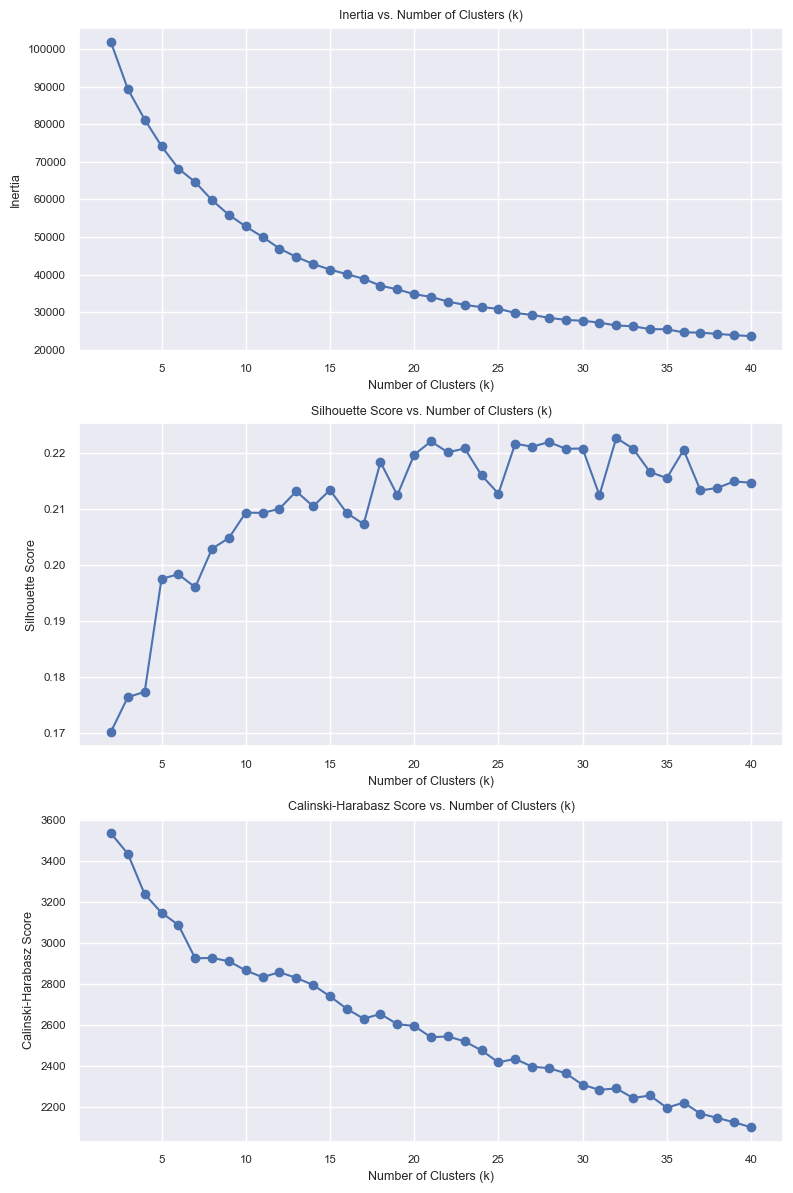

In [117]:
# Clustering for shooter
cluster_res_shooter = perform_kmeans(df_mod2_label_encoded_shooter, 40)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\clust

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


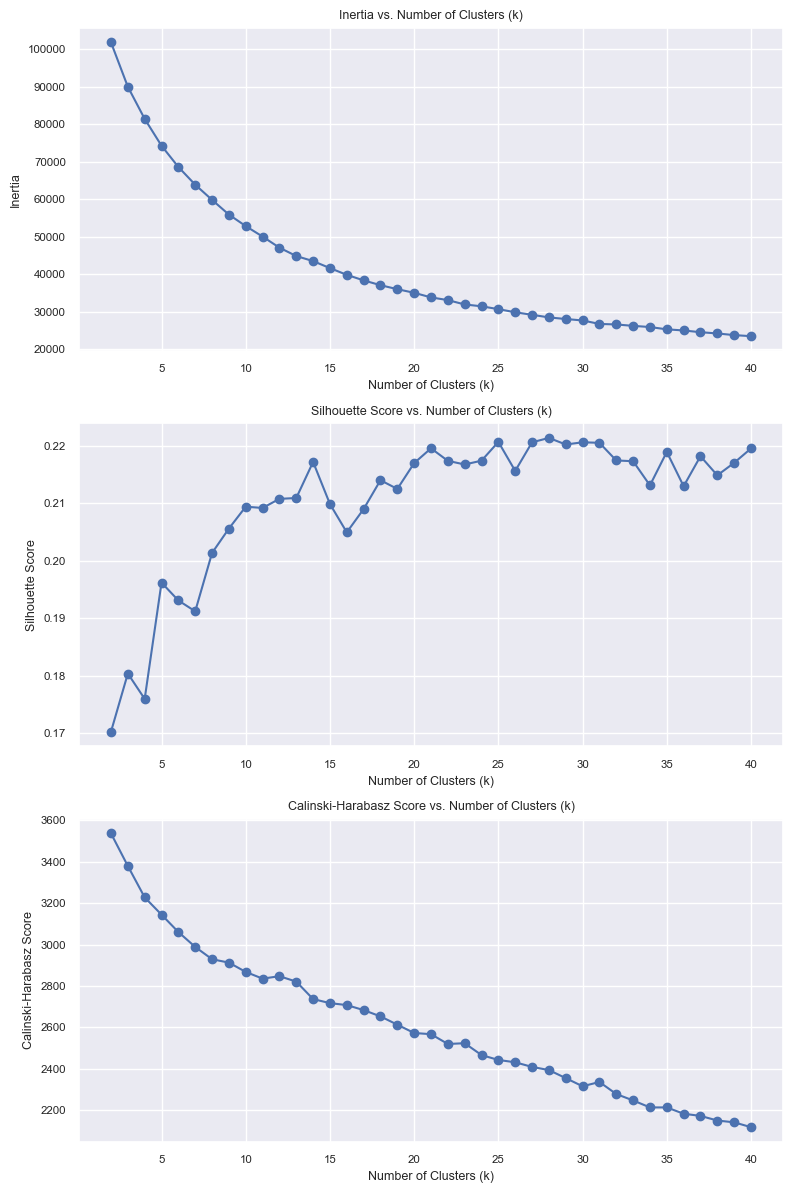

In [118]:
cluster_res_action = perform_kmeans(df_mod2_label_encoded_action, 40)

In [119]:
def visualize_kmeans(x, y, labels, xlabel, ylabel, title):

    # Create a scatter plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    plt.scatter(x, y, c=labels, label = 'Centroid', cmap="viridis")  # 'alpha' controls the transparency of points
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    # Add a colorbar to indicate the meaning of colors
    colorbar = plt.colorbar()
    colorbar.set_label("Cluster Label")
    
    plt.legend()

    # Show the plot
    plt.show()


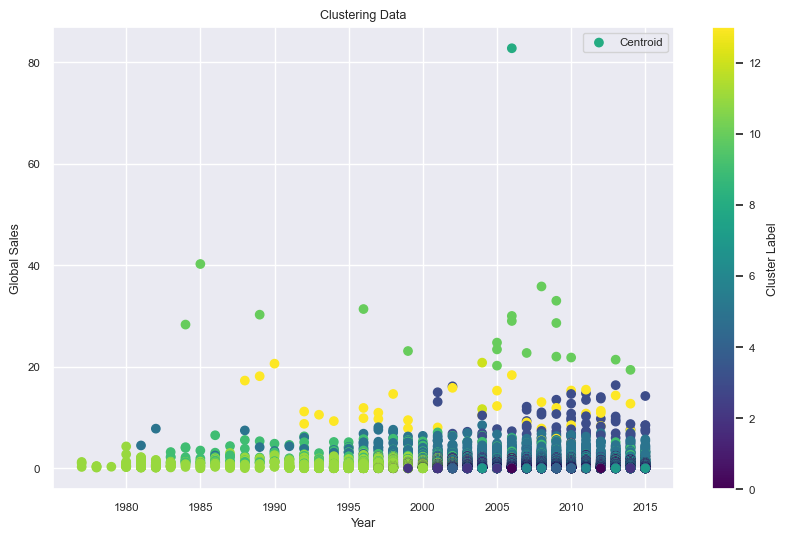

In [120]:
# Extract the columns
x = df_mod2_label_encoded_shooter["Year"]
y = df_mod2_label_encoded_shooter["Global_Sales"]

# Saving lables for k=13
shooter_labels = cluster_res_shooter[3][11]

visualize_kmeans(x, y, shooter_labels, "Year", "Global Sales", "Clustering Data")

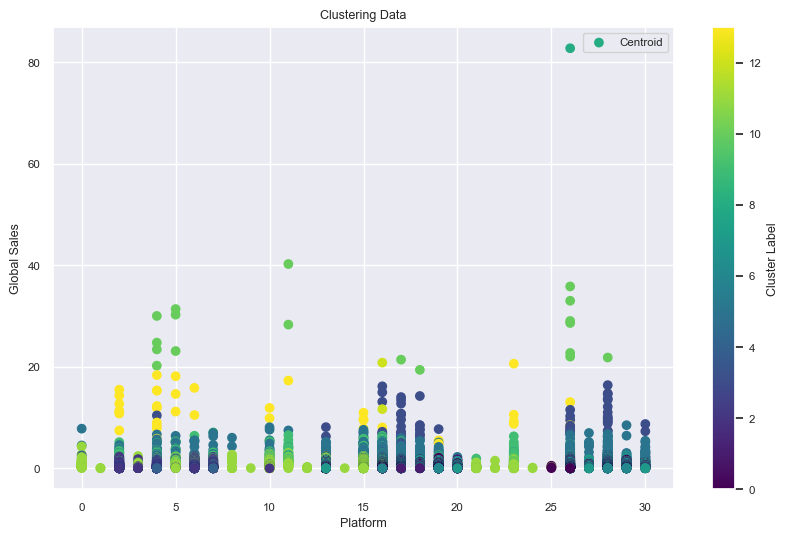

In [121]:
# Extract the columns
x = df_mod2_label_encoded_shooter["Platform"]
y = df_mod2_label_encoded_shooter["Global_Sales"]
shooter_labels = cluster_res_shooter[3][11]

visualize_kmeans(x, y, shooter_labels, "Platform", "Global Sales", "Clustering Data")

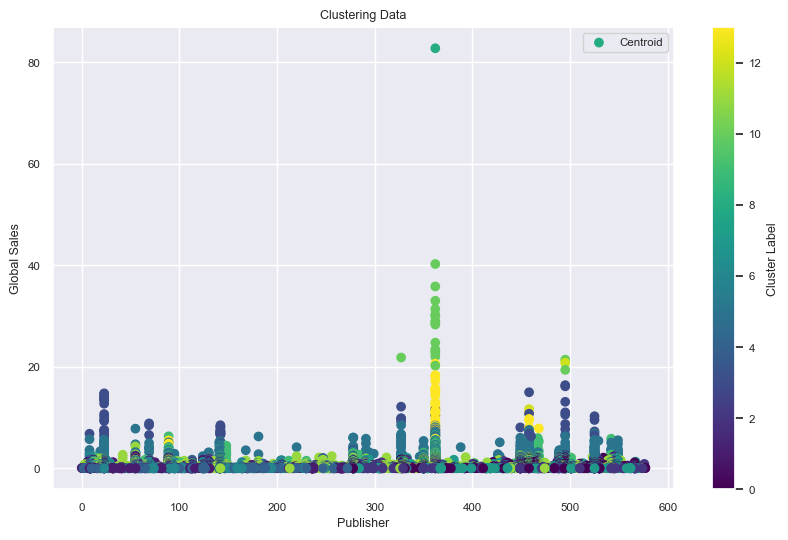

In [122]:
# Extract the columns
x = df_mod2_label_encoded_shooter["Publisher"]
y = df_mod2_label_encoded_shooter["Global_Sales"]

# Saving lables for k=13
shooter_labels = cluster_res_shooter[3][11]

visualize_kmeans(x, y, shooter_labels, "Publisher", "Global Sales", "Clustering Data")

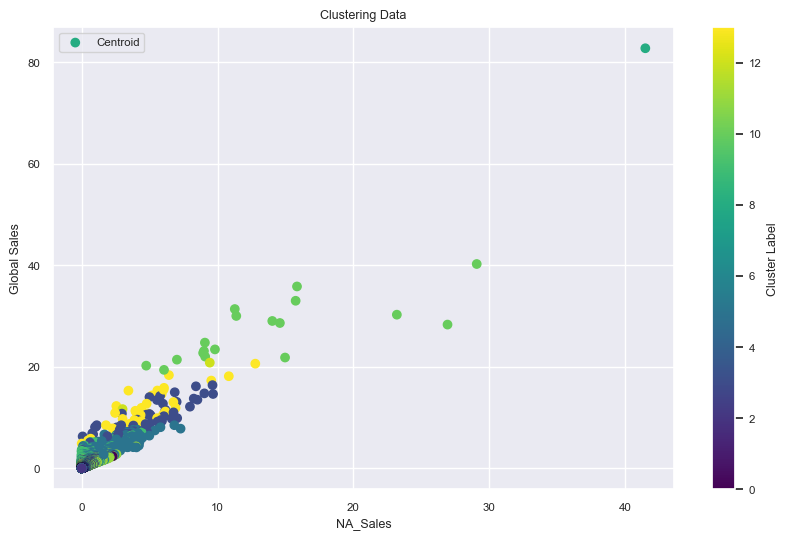

In [123]:
# Extract the columns
x = df_mod2_label_encoded_shooter["NA_Sales"]
y = df_mod2_label_encoded_shooter["Global_Sales"]

# Saving lables for k=13
shooter_labels = cluster_res_shooter[3][11]

visualize_kmeans(x, y, shooter_labels, "NA_Sales", "Global Sales", "Clustering Data")